# Exercise 3: Exploratory Analysis

---

## House Prices - Advanced Regression Techniques

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

Import the “train.csv” data from the downloaded data folder (has four files) in Jupyter Notebook.

In [3]:
houseprice = pd.read_csv('train.csv')

Extract the numerical variables from the Data

In [4]:
houseNumData = pd.DataFrame(houseprice[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

Check the individual statistical description of each of these variables.

In [5]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


Visualize the statistical distributions of each of these variables.

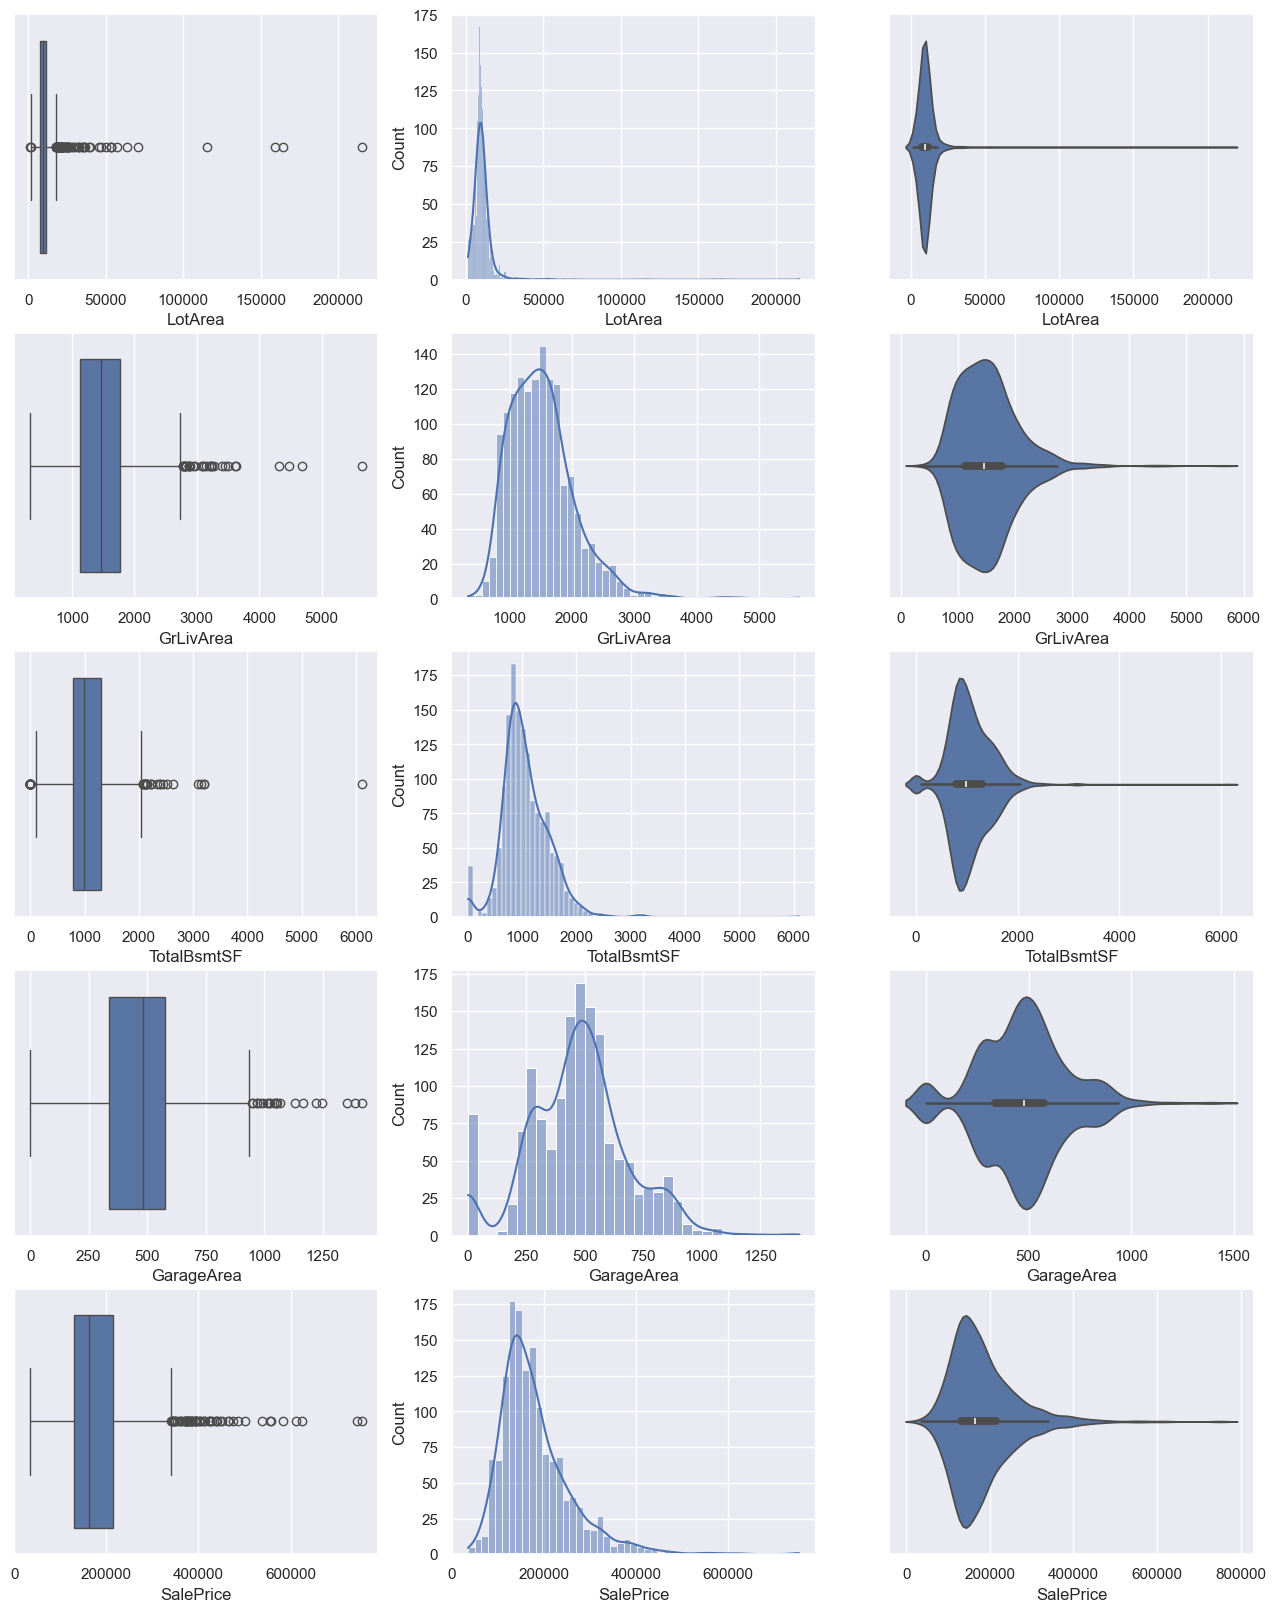

In [6]:
f, axes = plt.subplots(5, 3, figsize=(16, 20))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1], kde = True)
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

Check the relationship amongst the variables using mutual correlation and the correlation heatmap.Discuss with
your friends and determine which of the variables has the strongest correlation with “SalePrice”. Is it useful?

In [7]:
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


<Axes: >

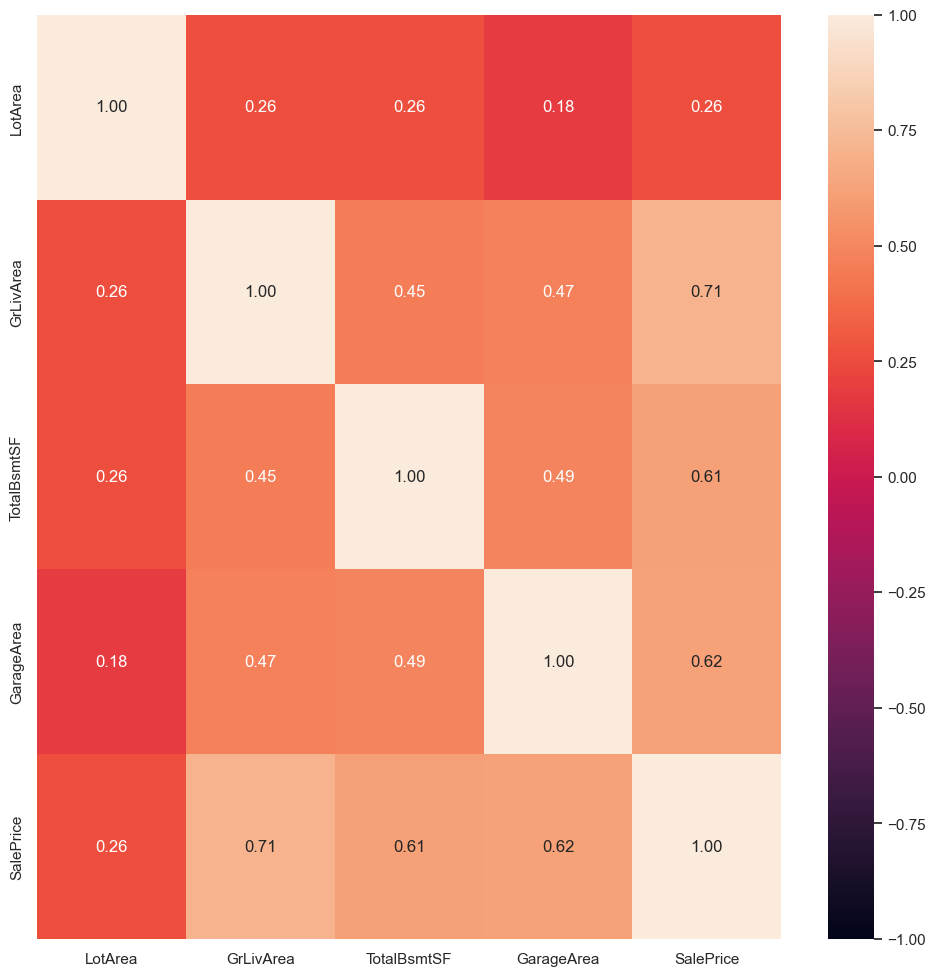

In [8]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(houseNumData.corr(), vmin='-1', vmax='1', annot=True, fmt='.2f')

Looking at the heat Map Above, GrLivArea seems like the strongest correlation

Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Discuss with your
friends and determine which of the variables has the strongest linear relation with “SalePrice”. Is it useful?

<Figure size 1200x1200 with 0 Axes>

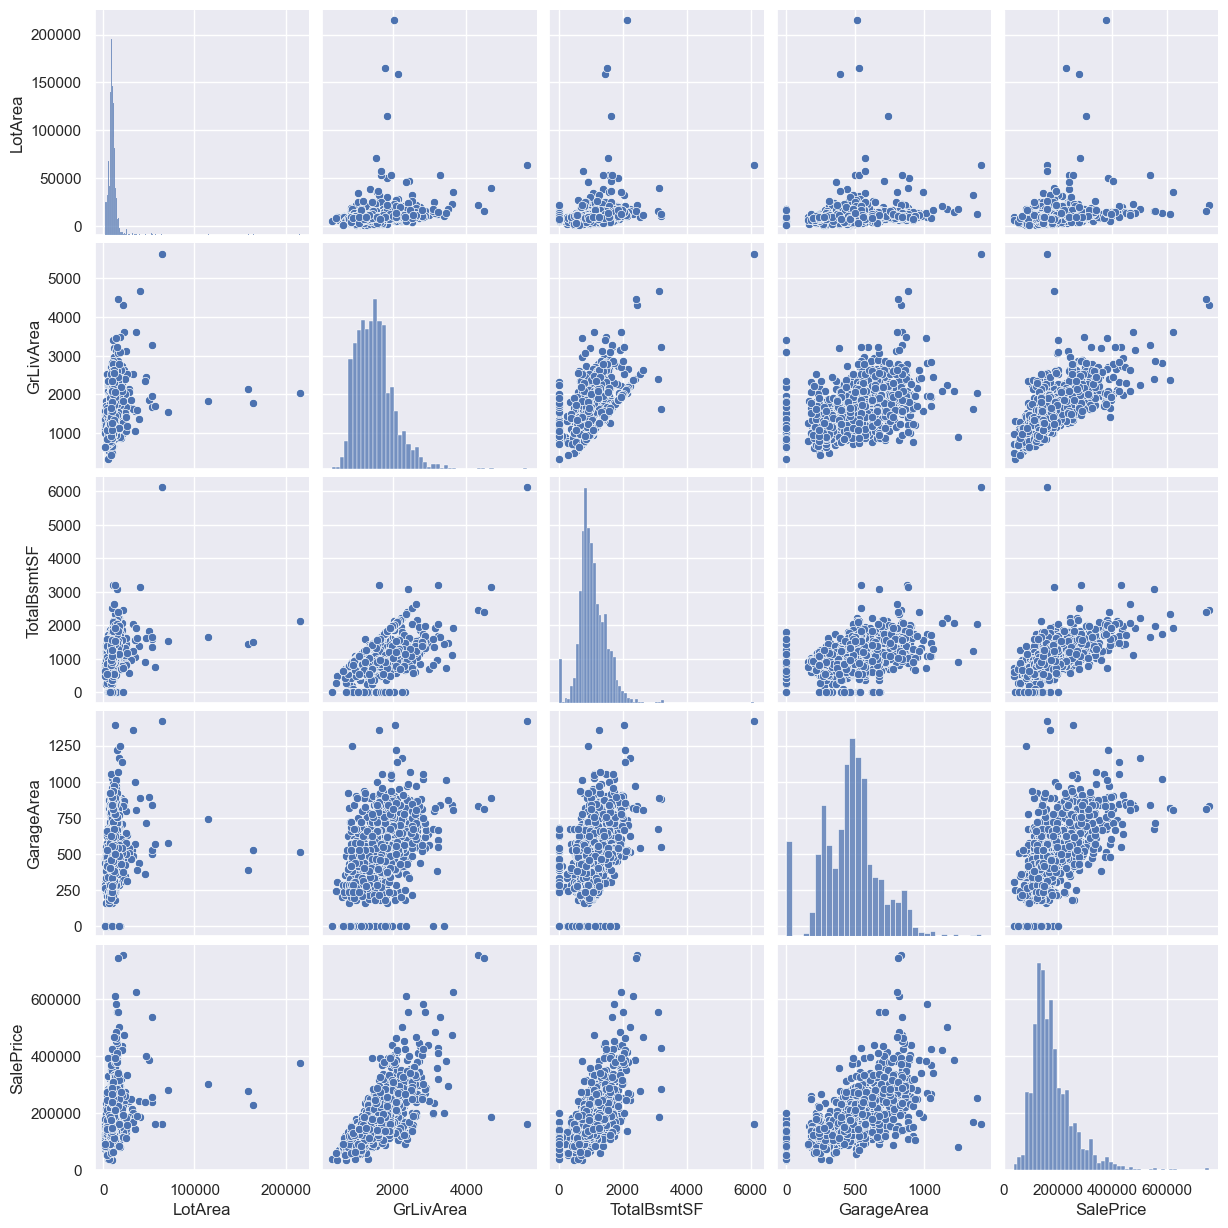

In [9]:
f = plt.figure(figsize=(12, 12))
sb.pairplot(data = houseNumData)

Extract the following Categorical variables from the dataset, and store as a new Pandas DataFrame.

In [10]:
houseCatData = pd.DataFrame(houseprice[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).

In [11]:
houseCatDataCat = houseCatData.astype("category")

In [12]:
houseCatDataCat.dtypes

MSSubClass      category
Neighborhood    category
BldgType        category
OverallQual     category
dtype: object

Check the individual statistical description of each of these variables.

In [13]:
for var in houseCatDataCat:
    print("Number of {}: {}".format(var, len(houseCatDataCat[var].unique())))
    print("{}\n\n\n\n".format(houseCatDataCat[var].value_counts()))

Number of MSSubClass: 15
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64




Number of Neighborhood: 25
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64




Number of BldgType: 5
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64




Number of OverallQual: 10
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64






Visualize the distributions (catplot) of each of these variables.

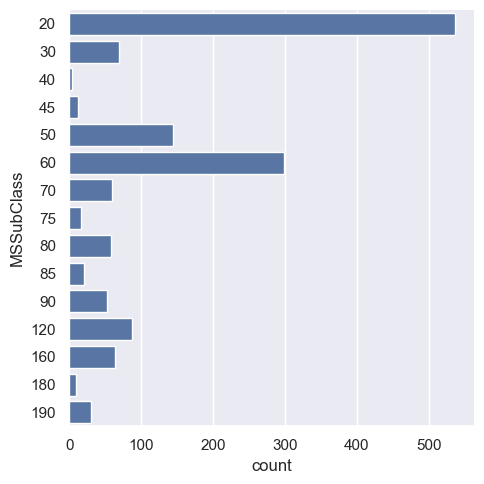

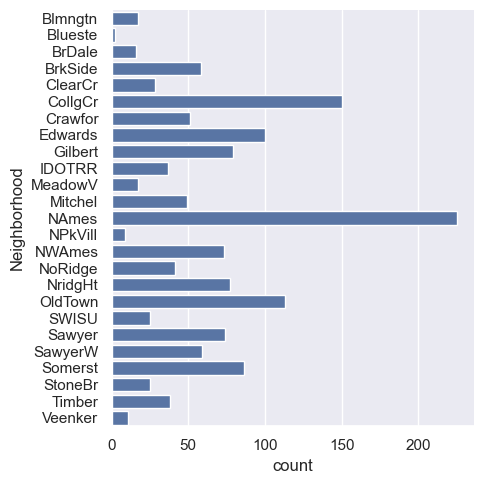

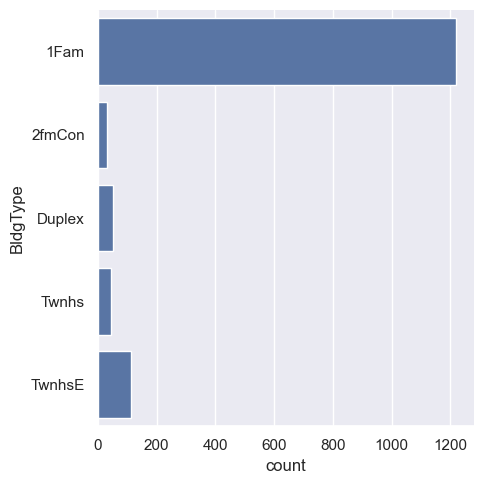

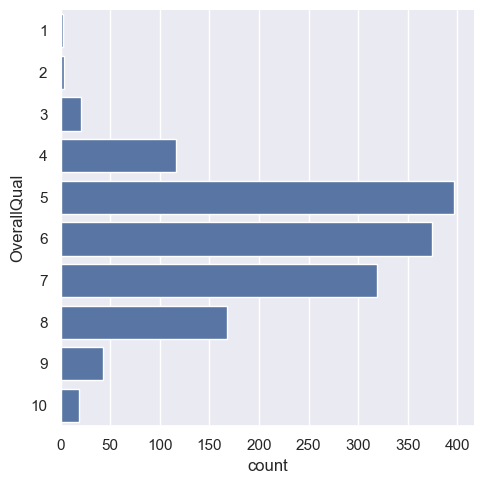

In [14]:
count = 0
for var in houseCatDataCat:
    sb.catplot(data = houseCatDataCat[var], kind="count")
    count += 1

Check the relationship amongst the variables using bi-variate heatmap of counts. Discuss with your friends and
see if you can figure any intuitive relationship of “OverallQual” with the other three variables? Is this useful?

/var/folders/0g/q6wgl76d3w3dkd4l5yhyfg440000gn/T/ipykernel_80826/1770607891.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sb.heatmap(houseCatDataCat.groupby(['OverallQual', val]).size().unstack(),
/var/folders/0g/q6wgl76d3w3dkd4l5yhyfg440000gn/T/ipykernel_80826/1770607891.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sb.heatmap(houseCatDataCat.groupby(['OverallQual', val]).size().unstack(),
/var/folders/0g/q6wgl76d3w3dkd4l5yhyfg440000gn/T/ipykernel_80826/1770607891.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obser

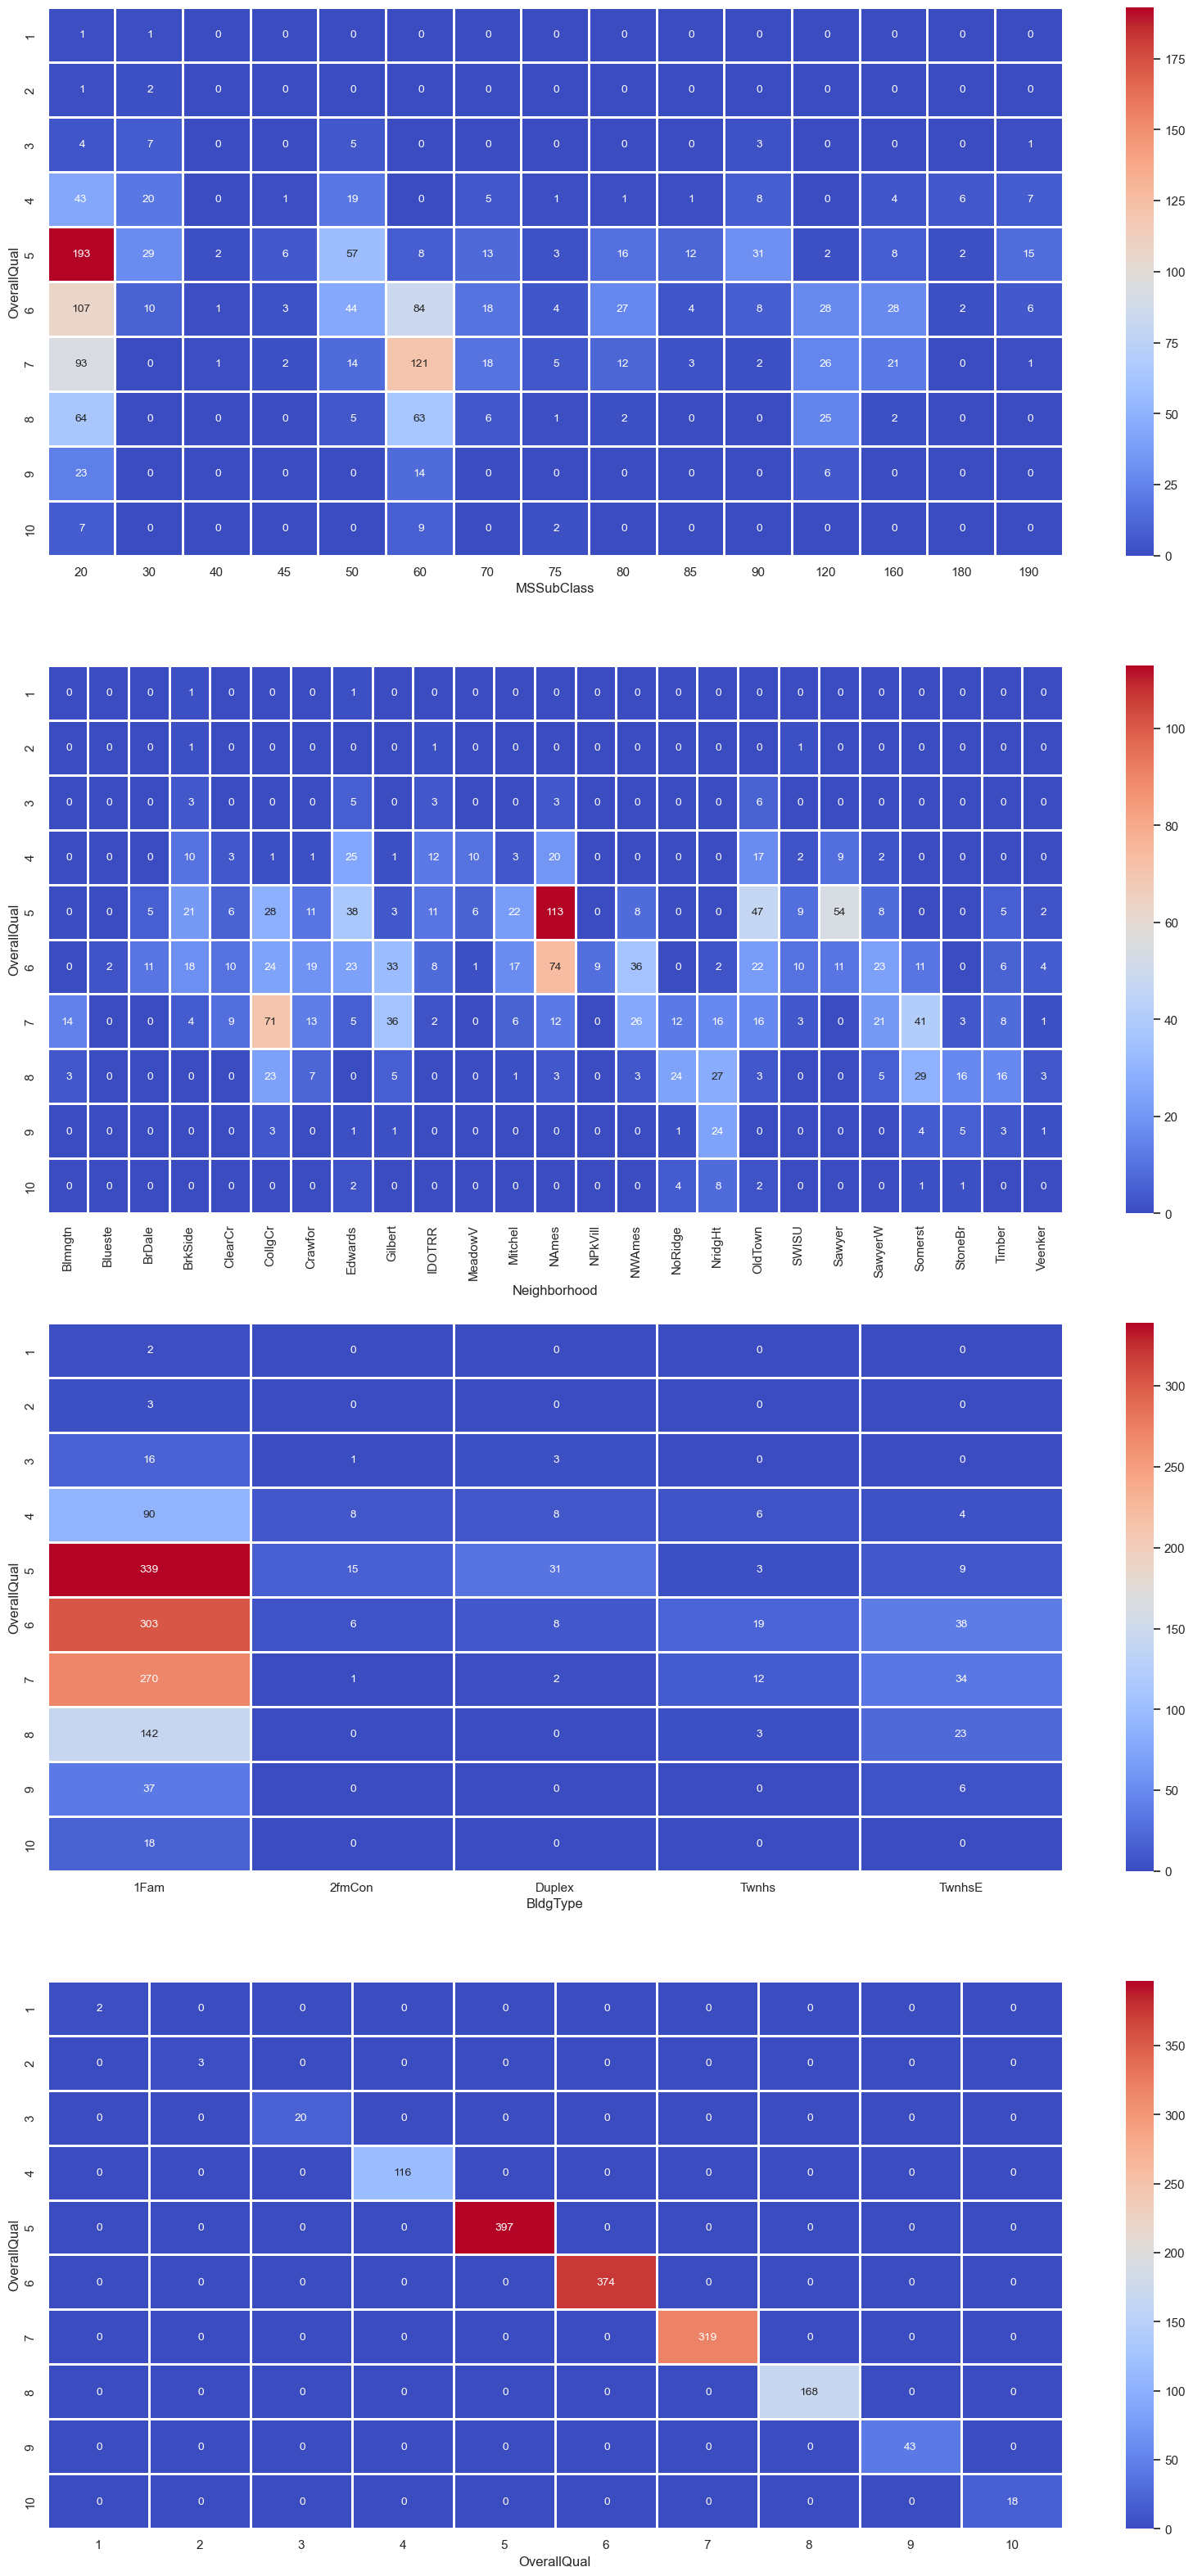

In [17]:
f, axes = plt.subplots(4, 1, figsize=(20, 40))

count = 0
for val in houseCatDataCat:
        sb.heatmap(houseCatDataCat.groupby(['OverallQual', val]).size().unstack(),
                linewidths = 1, annot = True, annot_kws = {"size": 10}, ax = axes[count], fmt="2d", cmap="coolwarm")
        count += 1

Draw boxplots of “SalePrice” against each of these categorical variables. Discuss with your friends and find out
if you see any pattern in these boxplots. Which of these variables has the strongestrelationship with “SalePrice”?

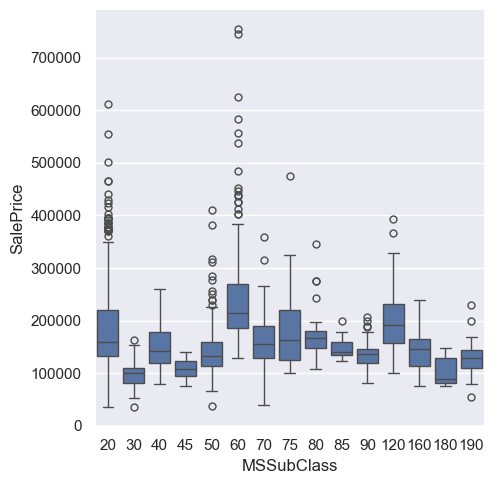

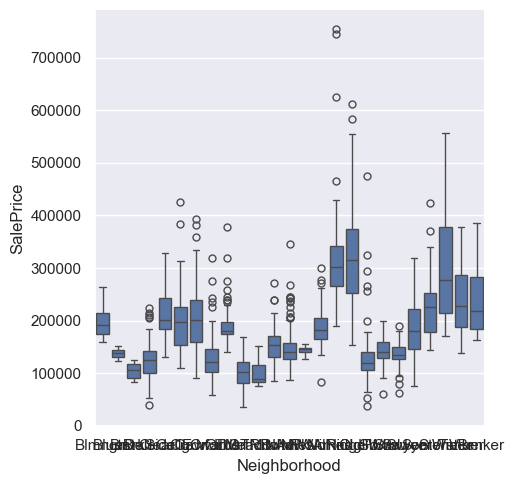

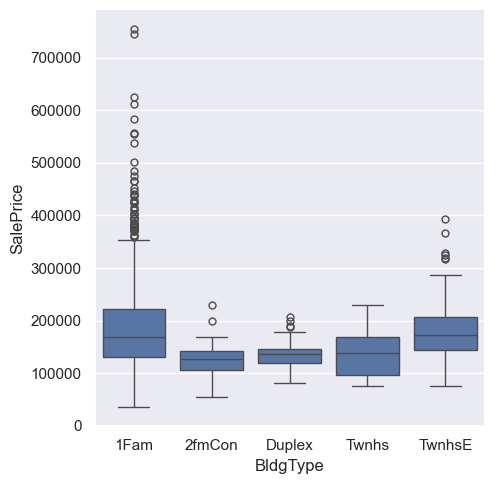

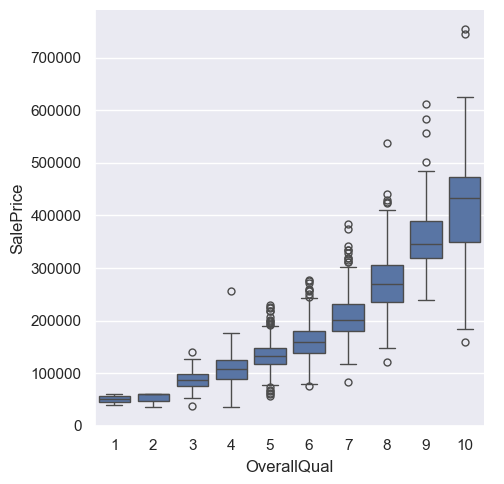

In [16]:
d1 = pd.DataFrame(houseNumData["SalePrice"])
count = 0

for val in houseCatDataCat:
    
    d2 = pd.DataFrame(houseCatDataCat[val])
    datacomp = pd.concat([d2, d1], axis=1)
    sb.catplot(data=datacomp, x=val, y='SalePrice', kind="box")
    count += 1